In [1]:
import pandas as pd
import numpy as np

import nltk

import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary


from sklearn.feature_extraction.text import CountVectorizer


In [2]:
data = pd.read_csv('Elderly_survey_final.csv')

In [3]:
#getting rid of unnecessary columns at the front
data.drop(data.iloc[:, 0:18], inplace = True, axis = 1) 
  

In [4]:
#to get rid of unnecessary columns at the back
data.drop(data.iloc[:, 30:37], inplace = True, axis = 1) 
  

In [5]:
data

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31
0,Gender性别Jantina,Age岁数\nUmur,Where do you live?请问您住在哪里？\nAnda tinggal dekat...,Are you working currently?你现在还有工作吗？Adakah anda...,How often do you come to Bras Basah-Bugis Dist...,What kind of activities do you do in your free...,Do you wish you can have an opportunity to int...,How often do you exercise?你有运动的吗？如果有，请问你多时常做运动...,What is your reason for not exercising? 请问为什么...,What are some forms of exercise which you do?你...,...,What would you say is your understanding of te...,If no understanding or very little understandi...,What kind of technologies and/or apps do you u...,Would you like to learn more about using vario...,"If yes, what would you want to learn?如果您想要学，您会...",Do you know how to shop online? 请问您懂得如何在网上购物吗？...,"If yes, What are some reasons you shop online?...",What are some reasons you don't shop online?请问...,"If there are guidance, do you wish you know ho...",What type of skill workshops would you be inte...
1,"{""ImportId"":""QID31""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID15_TEXT""}","{""ImportId"":""QID24""}","{""ImportId"":""QID1""}","{""ImportId"":""QID45_TEXT""}","{""ImportId"":""QID21""}","{""ImportId"":""QID11""}","{""ImportId"":""QID30_TEXT""}","{""ImportId"":""QID37_TEXT""}",...,"{""ImportId"":""QID49""}","{""ImportId"":""QID50_TEXT""}","{""ImportId"":""QID46""}","{""ImportId"":""QID47""}","{""ImportId"":""QID48""}","{""ImportId"":""QID17""}","{""ImportId"":""QID20_TEXT""}","{""ImportId"":""QID38_TEXT""}","{""ImportId"":""QID18""}","{""ImportId"":""QID12_TEXT""}"
2,Female,91,Bishan,No,Once a Month,"Stay at home, read newspaper",No,I don't exercise,Lazy,NaN,...,No understanding （完全不懂）(Tidak ada),Wants to sleep only,Smart Phone （智能手机）(Telefon pintar),No,NaN,No,NaN,Use phone to call,No,NaN
3,Male,46,20 km from bugis,Yes,Daily,Always taking care of the shop,No,I don't exercise,Lazy man,NaN,...,Very well （懂很多）(Baik),NaN,"Computer （电脑）(Komputer),Smart Phone （智能手机）(Tel...",No,NaN,No,NaN,No money and inconvenient,No,Not interested
4,Male,81,Toa payoh,Yes,Once a Month,"Use FB, brisk walking",Yes,Once a week to 3 times a week,NaN,Qigong,...,A little （懂一点点）(Sikit),No need,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",No,NaN,No,NaN,No need,No,NaN
5,Female,68,Bras basah,Yes,Daily,Sell flowers,Yes,I don't exercise,Not free,NaN,...,No understanding （完全不懂）(Tidak ada),Never encounter,NaN,Yes,Smart Phone （智能手机) (Telefon Pintar),No,NaN,No smart phone,Yes,Not sure
6,Male,61,Tampines,Yes,Once a Month,Play and visit friends,Yes,Once a week to 3 times a week,NaN,Walk only,...,A little （懂一点点）(Sikit),Not sure,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,NaN,Don't know how to use the app and make account,Yes,Open to any workshops as long as can attend an...
7,Male,80,Marine Parade,Yes,Few times a Week,Look after dying people at Dover Park hospice.,No,4 times a week to everyday,NaN,Walking near his house,...,A little （懂一点点）(Sikit),He does everything manually. He dont use smart...,Computer （电脑）(Komputer),No,NaN,No,NaN,He dont even shop. He lives a sinple life. His...,No,No skills. He just want to help people who are...
8,Male,87,Tanjong Pagar,No,Once a Month,"Go to CC and chat, swimming, qigong",Yes,4 times a week to everyday,NaN,"Swimming, brisk walking, qigong",...,A little （懂一点点）(Sikit),"Too tedious, may appear disconnected because g...","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Facebook（脸...",No,NaN,Because I dont know. Sacred that wife will sco...,Yes,Learn how to send photo using whatsapp
9,Male,60,Chinatown,Yes,Daily,"Take a stroll, meet friends",No,4 times a week to everyday,NaN,"Walking, taking a stroll",...,A little （懂一点点）(Sikit),"Difficult to surf, download games and apps","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Other Mobi...",No,NaN,"Security reasons, pr

In [6]:
#getting rid of row 1
data.drop([1],axis=0)

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31
0,Gender性别Jantina,Age岁数\nUmur,Where do you live?请问您住在哪里？\nAnda tinggal dekat...,Are you working currently?你现在还有工作吗？Adakah anda...,How often do you come to Bras Basah-Bugis Dist...,What kind of activities do you do in your free...,Do you wish you can have an opportunity to int...,How often do you exercise?你有运动的吗？如果有，请问你多时常做运动...,What is your reason for not exercising? 请问为什么...,What are some forms of exercise which you do?你...,...,What would you say is your understanding of te...,If no understanding or very little understandi...,What kind of technologies and/or apps do you u...,Would you like to learn more about using vario...,"If yes, what would you want to learn?如果您想要学，您会...",Do you know how to shop online? 请问您懂得如何在网上购物吗？...,"If yes, What are some reasons you shop online?...",What are some reasons you don't shop online?请问...,"If there are guidance, do you wish you know ho...",What type of skill workshops would you be inte...
2,Female,91,Bishan,No,Once a Month,"Stay at home, read newspaper",No,I don't exercise,Lazy,NaN,...,No understanding （完全不懂）(Tidak ada),Wants to sleep only,Smart Phone （智能手机）(Telefon pintar),No,NaN,No,NaN,Use phone to call,No,NaN
3,Male,46,20 km from bugis,Yes,Daily,Always taking care of the shop,No,I don't exercise,Lazy man,NaN,...,Very well （懂很多）(Baik),NaN,"Computer （电脑）(Komputer),Smart Phone （智能手机）(Tel...",No,NaN,No,NaN,No money and inconvenient,No,Not interested
4,Male,81,Toa payoh,Yes,Once a Month,"Use FB, brisk walking",Yes,Once a week to 3 times a week,NaN,Qigong,...,A little （懂一点点）(Sikit),No need,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",No,NaN,No,NaN,No need,No,NaN
5,Female,68,Bras basah,Yes,Daily,Sell flowers,Yes,I don't exercise,Not free,NaN,...,No understanding （完全不懂）(Tidak ada),Never encounter,NaN,Yes,Smart Phone （智能手机) (Telefon Pintar),No,NaN,No smart phone,Yes,Not sure
6,Male,61,Tampines,Yes,Once a Month,Play and visit friends,Yes,Once a week to 3 times a week,NaN,Walk only,...,A little （懂一点点）(Sikit),Not sure,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,NaN,Don't know how to use the app and make account,Yes,Open to any workshops as long as can attend an...
7,Male,80,Marine Parade,Yes,Few times a Week,Look after dying people at Dover Park hospice.,No,4 times a week to everyday,NaN,Walking near his house,...,A little （懂一点点）(Sikit),He does everything manually. He dont use smart...,Computer （电脑）(Komputer),No,NaN,No,NaN,He dont even shop. He lives a sinple life. His...,No,No skills. He just want to help people who are...
8,Male,87,Tanjong Pagar,No,Once a Month,"Go to CC and chat, swimming, qigong",Yes,4 times a week to everyday,NaN,"Swimming, brisk walking, qigong",...,A little （懂一点点）(Sikit),"Too tedious, may appear disconnected because g...","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Facebook（脸...",No,NaN,Because I dont know. Sacred that wife will sco...,Yes,Learn how to send photo using whatsapp
9,Male,60,Chinatown,Yes,Daily,"Take a stroll, meet friends",No,4 times a week to everyday,NaN,"Walking, taking a stroll",...,A little （懂一点点）(Sikit),"Difficult to surf, download games and apps","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Other Mobi...",No,NaN,"Security reasons, product issues",No,"Google, surfing internet, searching for inform..."
10,Male,82,Havelock Road,No,Few times a Week,Walk,Yes,I don't exercise,He only walks,NaN,...,A little （懂一点点）(Sikit),He only use smartphone,Smart Phone （智能手机）(Telefon pintar),No,NaN,No,NaN,He only does traditional shopping.,No,No skills.


In [7]:
#making row 0 the header
new_header = data.iloc[0] 

data = data[2:26] 

data.columns = new_header

In [8]:
#getting rid of rows which are not about eldelry
data.drop( data[data['Age岁数\nUmur'].astype(int) < 60 ].index , inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
data = data.replace(np.nan, '', regex=True)
data

,Gender性别Jantina,Age岁数\nUmur,Where do you live?请问您住在哪里？\nAnda tinggal dekat mana?,Are you working currently?你现在还有工作吗？Adakah anda masih berkerja?,How often do you come to Bras Basah-Bugis District?你有常来这个地区吗？如果有，请问您多常来？Apakah kekerapan anda datang ke Bras Basah-Bugis District?,What kind of activities do you do in your free time?请问您有空的时候会参与什么活动？\nApakah aktiviti-aktiviti yang anda lakukan pada masa lapang?,"Do you wish you can have an opportunity to interact more with the youth?请问您有没有意念与青年们交流？Jika diberi peluang, adakah anda ingin berinteraksi dengan belia/orang muda?",How often do you exercise?你有运动的吗？如果有，请问你多时常做运动？Berapa kali kamu bersen...,What is your reason for not exercising? 请问为什么您没有运动的习惯？Apakah sebab anda tidak bersenam?,What are some forms of exercise which you do?你都会做什么种类的运动？Apakah jenis senaman atau sukan yang anda lakukan?,...,What would you say is your understanding of technology?你觉得你对科技的了解有多少？Seberapa dalam pengetahuan anda tentang teknologi?,"If no understanding or very little understanding, what do you think is the reason?你觉得为什么会完全不懂或懂得很少呢？Jika pengetahuan anda tidak cukup, apakah sebabnya?",What kind of technologies and/or apps do you use?请问您有用到哪一种科技或应用程式？Apakah jenis teknologi/applikasi yang anda gunakan?,Would you like to learn more about using various technologies or apps if there are free courses/guidance by youths?假如大学生可以举办免费的课程或指点，您会想要多了解多样化的科技或应用程式吗？Akankah anda belajar tentang teknologi ataupun applikasi jika pelajar universiti memberikan kursus/bimbingan percuma?,"If yes, what would you want to learn?如果您想要学，您会想要学什么？\nApakah yang anda ingin ketahui?",Do you know how to shop online? 请问您懂得如何在网上购物吗？Adakah anda ketahui cara-cara membeli belah dalam talian?,"If yes, What are some reasons you shop online?请问您可以透露您网上购物的原因吗？Kenapa anda suka membeli belah dalam talian?",What are some reasons you don't shop online?请问您不使用网上购物的原因是什么？Kenapa anda tidak suka membeli belah dalam talian?,"If there are guidance, do you wish you know how to shop online safely to make your life more convenient?如果我们给与指点，您是否会想了解如何安全地在网上购物，好让您的生活更方便？Jika ada pertolongan, adakah kamu ingin tahu cara-cara untuk membeli belah dalam talian dengan mudah dan selamat?",What type of skill workshops would you be interested in to develop yourself?请问您对任何技能作坊感兴趣？Apakah jenis kursus kemahiran yang anda ingin hadiri untuk memperbaiki diri anda?
2,Female,91,Bishan,No,Once a Month,"Stay at home, read newspaper",No,I don't exercise,Lazy,,...,No understanding （完全不懂）(Tidak ada),Wants to sleep only,Smart Phone （智能手机）(Telefon pintar),No,,No,,Use phone to call,No,
4,Male,81,Toa payoh,Yes,Once a Month,"Use FB, brisk walking",Yes,Once a week to 3 times a week,,Qigong,...,A little （懂一点点）(Sikit),No need,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",No,,No,,No need,No,
5,Female,68,Bras basah,Yes,Daily,Sell flowers,Yes,I don't exercise,Not free,,...,No understanding （完全不懂）(Tidak ada),Never encounter,,Yes,Smart Phone （智能手机) (Telefon Pintar),No,,No smart phone,Yes,Not sure
6,Male,61,Tampines,Yes,Once a Month,Play and visit friends,Yes,Once a week to 3 times a week,,Walk only,...,A little （懂一点点）(Sikit),Not sure,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,,Don't know how to use the app and make account,Yes,Open to any workshops as long as can attend an...
7,Male,80,Marine Parade,Yes,Few times a Week,Look after dying people at Dover Park hospice.,No,4 times a week to everyday,,Walking near his house,...,A little （懂一点点）(Sikit),He does everything manually. He dont use smart...,Computer （电脑）(Komputer),No,,No,,He dont even shop. He lives a sinple life. His...,No,No skills. He just want to help people who are...
8,Male,87,Tanjong Pagar,No,Once a Month,"Go to CC and chat, swimming, qigong",Yes,4 times a week to everyday,,"Swimming, brisk walking, qigong",...,A little （懂一点点）(Sikit),"Too tedious, may appear disconnected because g...","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telef

In [10]:
exercise_forms = data['What are some forms of exercise which you do?你都会做什么种类的运动？Apakah jenis senaman atau sukan yang anda lakukan?']

In [11]:
list_exercise_forms = exercise_forms.values.tolist()

In [12]:
print(list_exercise_forms)

['', 'Qigong', '', 'Walk only', 'Walking near his house', 'Swimming, brisk walking, qigong', 'Walking, taking a stroll', '', '', 'Swimming, walking', 'Walking', '', '', '', 'Swimming, run', '', 'Walking', 'Use park facilities for exercising', '', 'Cycling and running, walking', '', '', 'Walking']


In [13]:
from nltk.tokenize import word_tokenize
 

#create lemmatizer
wnl = nltk.stem.wordnet.WordNetLemmatizer()


In [14]:
from nltk.corpus import stopwords
import string
stop_list = stopwords.words('english') + [char for char in string.punctuation] + ["''"] +['near',"taking","use"]
print(stop_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
def process_allresponses(list_of_responses):
    processed_responses = []
    response_tokens = []
    for response in list_of_responses:
        response = response.lower()
        response_tokens = word_tokenize(response)
        #print(response_tokens)
        response_tokens = [token for token in response_tokens if token not in stop_list]
        response_tokens = [wnl.lemmatize(token) for token in response_tokens] 
        #response_tokens = [token for token in response_tokens if token != '']
        #print(response_tokens)
        response_tokens = [token for token in response_tokens if len(token) > 1]
        
        processed_responses.append(" ".join(response_tokens))
        while("" in processed_responses) : 
            processed_responses.remove("") 
        #processed_responses = [token for token in processed_responses if token!=[]]
    return processed_responses
print(process_allresponses(list_exercise_forms))

['qigong', 'walk', 'walking house', 'swimming brisk walking qigong', 'walking stroll', 'swimming walking', 'walking', 'swimming run', 'walking', 'park facility exercising', 'cycling running walking', 'walking']


In [16]:
corpus = process_allresponses(list_exercise_forms)
print(corpus)

['qigong', 'walk', 'walking house', 'swimming brisk walking qigong', 'walking stroll', 'swimming walking', 'walking', 'swimming run', 'walking', 'park facility exercising', 'cycling running walking', 'walking']


In [17]:
cv = CountVectorizer(corpus)
count_vect = cv.fit_transform(corpus)

In [18]:
vocab = cv.get_feature_names()
cv_matrix = count_vect.toarray()

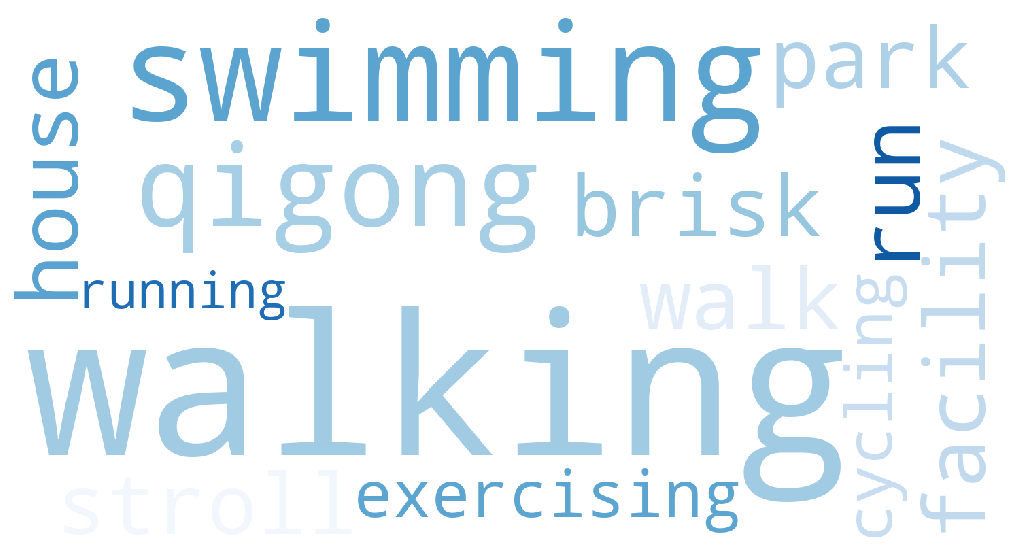

In [28]:
def listToString(s):  
     
    str1 = " " 
    
    # return string   
    return (str1.join(s))

import matplotlib.pyplot as plt
from wordcloud import WordCloud
my_wordcloud = WordCloud(background_color='white',
                         width=1500,
                         height=800,colormap='Blues').generate(listToString(corpus))
plt.figure(figsize=(20,10))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()


In [20]:
from sklearn.feature_extraction.text import CountVectorizer 
texts = corpus
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)


[('walking', 8),
 ('swimming', 3),
 ('qigong', 2),
 ('walk', 1),
 ('house', 1),
 ('brisk', 1),
 ('stroll', 1),
 ('run', 1),
 ('park', 1),
 ('facility', 1),
 ('exercising', 1),
 ('cycling', 1),
 ('running', 1)]

In [21]:
from nltk.corpus import stopwords
import string
stop_list = stopwords.words('english') + [char for char in string.punctuation] + ["''"] +['near',"taking","use","park","house","brisk","facilities","exercising"]
print(stop_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
porter = nltk.PorterStemmer()

def process_allresponses(list_of_responses):
    processed_responses = []
    response_tokens = []
    for response in list_of_responses:
        response = response.lower()
        response_tokens = word_tokenize(response)
        #print(response_tokens)
        response_tokens = [token for token in response_tokens if token not in stop_list]
        #print(response_tokens)
        response_tokens = [wnl.lemmatize(token) for token in response_tokens]
        #response_tokens = [token=='cycle' for token in response_tokens if token == 'cycling']
        response_tokens = [porter.stem(token) for token in response_tokens] 
        response_tokens = [token for token in response_tokens if len(token) > 1]
        
        processed_responses.append(" ".join(response_tokens))
        while("" in processed_responses) : 
            processed_responses.remove("") 
        #processed_responses = [token for token in processed_responses if token!=[]]
    return processed_responses
print(process_allresponses(list_exercise_forms))

['qigong', 'walk', 'walk', 'swim walk qigong', 'walk stroll', 'swim walk', 'walk', 'swim run', 'walk', 'cycl run walk', 'walk']


In [23]:
corpus_2 = ['qigong', 'walk', 'walk', 'swim walk qigong', 'walk stroll', 'swim walk', 'walk', 'swim run', 'walk', 'cycle run walk', 'walk']
print(corpus_2)

['qigong', 'walk', 'walk', 'swim walk qigong', 'walk stroll', 'swim walk', 'walk', 'swim run', 'walk', 'cycle run walk', 'walk']


In [24]:
cv = CountVectorizer(corpus_2)
count_vect = cv.fit_transform(corpus_2)

In [25]:
vocab = cv.get_feature_names()
cv_matrix = count_vect.toarray()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer 
texts = corpus_2
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
list_of_tuples = sorted(words_freq, key = lambda x: x[1], reverse=True)
list_of_tuples

[('walk', 9),
 ('swim', 3),
 ('qigong', 2),
 ('run', 2),
 ('stroll', 1),
 ('cycle', 1)]

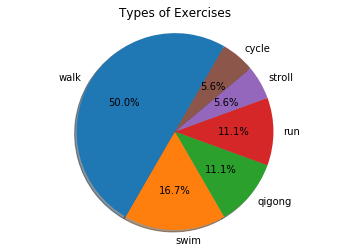

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = [tuple[0] for tuple in list_of_tuples]

sizes = [tuple[1] for tuple in list_of_tuples]

fig, ax = plt.subplots()
ax.pie(sizes,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=1500)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Types of Exercises')


plt.show()